# ANALYSIS: FIRST INFORMATION OFFICER & CRIME ANALYSIS IN BOSTON 

- For this analysis I have call seperate database through API and relate the crime incidences and FIO numbers

In [1]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from bokeh.plotting import *
from bokeh.models import HoverTool
import numpy as np

In [2]:
df=pd.read_csv("../data/ProcessedData/merged_crime_data_2012_to_2017.csv")

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# df1= df.groupby('STREET').INCIDENT_NUM.count()
# df1 = df1.reset_index(inplace=False)
# df1 = df1.sort_values(by='INCIDENT_NUM',ascending=False)
# df1.head()

In [4]:
df_Cri=df[df['YEAR'].isin([2015])]
df_Cri['DATE']=df_Cri.OCCURRED_ON_DATE.apply(lambda x: x.split('T')[0])

/Users/rajusingh/anaconda/envs/eq_env/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [5]:
df_Cri1=df_Cri.groupby('MONTH').INCIDENT_NUM.count()
df_Cri1=df_Cri1.reset_index(inplace=False)
df_Cri1.head()

,MONTH,INCIDENT_NUM
0,1,6583
1,2,6392
2,3,7032
3,4,6806
4,5,7362


In [6]:
df_FIO=pd.read_csv("../data/ProcessedData/BostonPoliceDepartmentFIO_2014_to_2017.csv")

In [7]:
df_FIO['years']=df_FIO.fio_date.apply(lambda x: x.split('-')[0])
df_FIO['months']=df_FIO.fio_date.apply(lambda x: x.split('-')[1])
df_FIO['dates']=df_FIO.fio_date.apply(lambda x: x.split('T')[0])

In [8]:
df_FIO1=df_FIO[df_FIO.years.apply(lambda x: '2015' in x )]

In [9]:
df_FIO2=df_FIO1.groupby('months').seq_num.count()
df_FIO2=df_FIO2.reset_index(inplace=False)
df_FIO2.columns=['DATE', 'FIO_NUM_PERDAY']
df_FIO2

,DATE,FIO_NUM_PERDAY
0,01,1898
1,02,894
2,03,2037
3,04,1975
4,05,2066
5,06,577
6,07,7
7,08,10
8,09,9
9,10,8


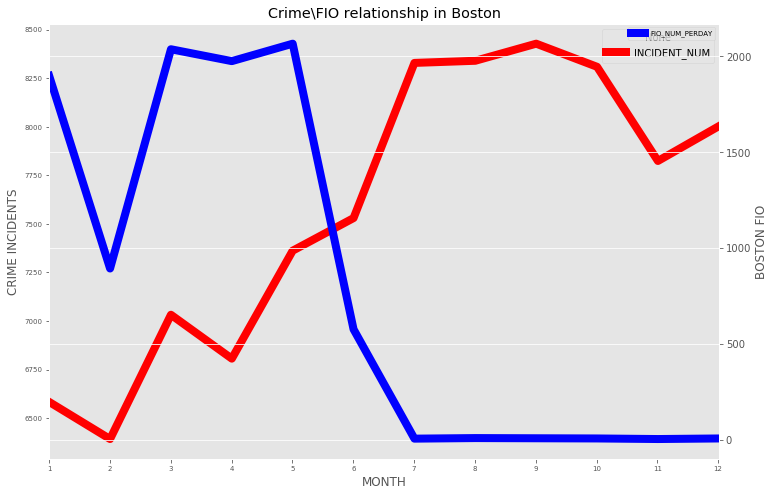

In [10]:
plt.figure(figsize=(12,8))
pt1=df_Cri1["INCIDENT_NUM"].plot(kind='line',title='Crime\FIO relationship in Boston',fontsize=7)
pt1.set_ylabel('CRIME INCIDENTS')
pt1.set_xlabel("MONTH")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(df_Cri1.MONTH)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('red')
pt1.legend(fontsize=7)

pt2=df_FIO2["FIO_NUM_PERDAY"].plot(secondary_y=True,kind='line', title='Crime\FIO relationship in Boston',fontsize=7)
pt2.set_ylabel('BOSTON FIO')
#pt2.set_xlabel("Month")
#pt2.set_xticklabels(df_A.MONTH)
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('blue')
pt2.legend(fontsize=7)

plt.show()

# Conclusion: If we look above chart, we can figure out the relation between FIO and Crime numbers: 
- Number of FIO is inversely proprotional to the Crime numbers.
- When FIO number is more crime is less and vice-versa.

In [11]:
# To check crime pattern in Top Four district where FIO is more.

In [12]:
df_FIO3=df_FIO1.groupby('dist').seq_num.count()
df_FIO3=df_FIO3.reset_index(inplace=False)
df_FIO3.columns=['DISTRICT', 'FIO_NUM_DISTRICT']
df_FIO3=df_FIO3.sort_values(by='FIO_NUM_DISTRICT',ascending=False)
df_FIO3=df_FIO3[df_FIO3['DISTRICT'].isin(['B2','B3','D4','C11'])]
df_FIO3.head()

,DISTRICT,FIO_NUM_DISTRICT
4,B2,2651
5,B3,1546
10,D4,1274
7,C11,1035


In [13]:
df_Cri2=df_Cri[((df_Cri['DISTRICT'].isin(['B2','B3','D4','C11'])) & (df_Cri['YEAR']==2015))]

In [14]:
df_Cri2

,INCIDENT_NUM,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,STREET,LOCATION,DATE
218298,1.52017e+08,PhoneCalls,D4,2015-01-01T00:00:00.000,No,2015,1,Thursday,MARLBOROUGH ST,"{'type': 'Point', 'coordinates': [-71.07547, 4...",2015-01-01
218299,1.52015e+08,OTHER LARCENY,D4,2015-01-01T00:00:00.000,No,2015,1,Thursday,NORTHAMPTON ST,"{'type': 'Point', 'coordinates': [-71.077895, ...",2015-01-01
218300,1.52001e+08,SIMPLE ASSAULT,D4,2015-01-01T00:00:00.000,No,2015,1,Thursday,LANSDOWNE ST,"{'type': 'Point', 'coordinates': [-71.0981, 42...",2015-01-01
218302,1.52008e+08,InvProp,D4,2015-01-01T00:00:00.000,No,2015,1,Thursday,W NEWTON ST,"{'type': 'Point', 'coordinates': [-71.075585, ...",2015-01-01
218303,1.52e+08,OTHER LARCENY,D4,2015-01-01T00:00:00.000,No,2015,1,Thursday,LANSDOWNE ST,"{'type': 'Point', 'coordinates': [-71.095995, ...",2015-01-01
218304,1.52013e+08,PropLost,B3,2015-01-01T00:00:00.000,No,2015,1,Thursday,RIVER ST,"{'type': 'Point', 'coordinates': [-71.09178, 4...",2015-01-01
218305,1.52005e+08,RESIDENTIAL BURGLARY,C11,2015-01-01T00:00:00.000,No,2015,1,Thursday,CENTRE ST,"{'type': 'Point', 'coordinates': [-71.068105, ...",2015-01-01
218308,1.52e+08,SIMPLE ASSAULT,D4,2015-01-01T00:01:00.000,No,2015,1,Thursday,BROOKLINE AV,"{'type': 'Point', 'coordinates': [-71.098335, ...",2015-01-01
218312,1.52e+08,DISORDERLY,D4,2015-01-01T00:05:00.000,No,2015,1,Thursday,COMMONWEALTH AV,"{'type': 'Point', 'coordinates': [-71.09602, 4...",2015-01-01
218316,1.52e+08,SIMPLE ASSAULT,D4,2015-01-01T00:05:00.000,No,2015,1,Thursday,BOYLSTON ST,"{'type': 'Point', 'coordinates': [0, 0]}",2015-01-01


In [15]:
df_Cri3=df_Cri2.groupby('DISTRICT').INCIDENT_NUM.count()
df_Cri3=df_Cri3.reset_index(inplace=False)
#df_Cri3['AUTO_THIEFT']=df_Cri2[df_Cri2['OFFENSE_DESCRIPTION'].isin(['AUTO THEFT'])].groupby('DISTRICT').INCIDENT_NUM.count()
df_Cri3

,DISTRICT,INCIDENT_NUM
0,B2,14234
1,B3,9164
2,C11,12351
3,D4,12339


In [16]:
df_Cri4=df_Cri2[df_Cri2['OFFENSE_DESCRIPTION'].isin(['AUTO THEFT'])].groupby('DISTRICT').INCIDENT_NUM.count()

In [17]:
df_Cri4=df_Cri4.reset_index(inplace=False)
df_Cri4.columns=['DISTRICT','AUTO_THEFT_INCIDENT_NUM']
df_Cri4

,DISTRICT,AUTO_THEFT_INCIDENT_NUM
0,B2,191
1,B3,159
2,C11,180
3,D4,153


In [18]:
dfa=pd.merge(df_Cri3,df_Cri4)
dfb=pd.merge(df_FIO3,dfa)

In [19]:
pd.merge(df_FIO3,dfa)

,DISTRICT,FIO_NUM_DISTRICT,INCIDENT_NUM,AUTO_THEFT_INCIDENT_NUM
0,B2,2651,14234,191
1,B3,1546,9164,159
2,D4,1274,12339,153
3,C11,1035,12351,180


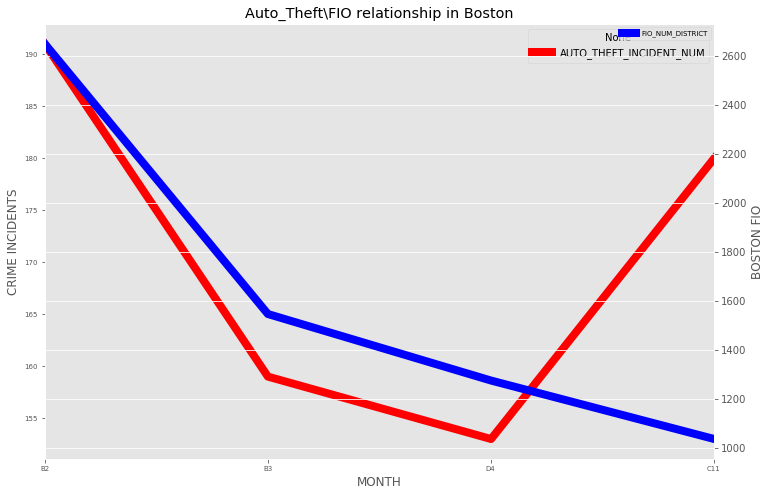

In [22]:
plt.figure(figsize=(12,8))
pt1=dfb["AUTO_THEFT_INCIDENT_NUM"].plot(kind='line',title='Auto_Theft\FIO relationship in Boston',fontsize=7)
pt1.set_ylabel('CRIME INCIDENTS')
pt1.set_xlabel("MONTH")

#to set ticks and correspoding labels
start, end = pt1.get_xlim()
pt1.set_xticks(np.arange(start, end, .999))
pt1.set_xticklabels(dfb.DISTRICT)
pt1.lines[-1].set_linewidth(8)
pt1.lines[-1].set_color('red')
pt1.legend(fontsize=7)

pt2=dfb["FIO_NUM_DISTRICT"].plot(secondary_y=True,kind='line', title='Auto_Theft\FIO relationship in Boston',fontsize=7)
pt2.set_ylabel('BOSTON FIO')
#pt2.set_xlabel("Month")
#pt2.set_xticklabels(df_A.MONTH)
pt2.lines[-1].set_linewidth(8)
pt2.lines[-1].set_color('blue')
pt2.legend(fontsize=7)

plt.show()